# **import library**

In [10]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle


# **Load Dataset And Train Model**

In [1]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model with correct input shape for MNIST
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Grayscale images with shape (28, 28, 1)

    # Your existing convolutional layers adapted for MNIST
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=32)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,026 (257.91 KB)

 Trainable params: 65,834 (257.16 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9158 - loss: 0.4050
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0477
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0320
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9917 - loss: 0.0271
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9947 - loss: 0.0194
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9963 - loss: 0.0123
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9964 - loss: 0.0118
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9971 - loss: 0.0103
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9967 - loss: 0.0109
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9978 - loss: 0.0074
Epoch 12/20
1875/1875 

# **Roc curve**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


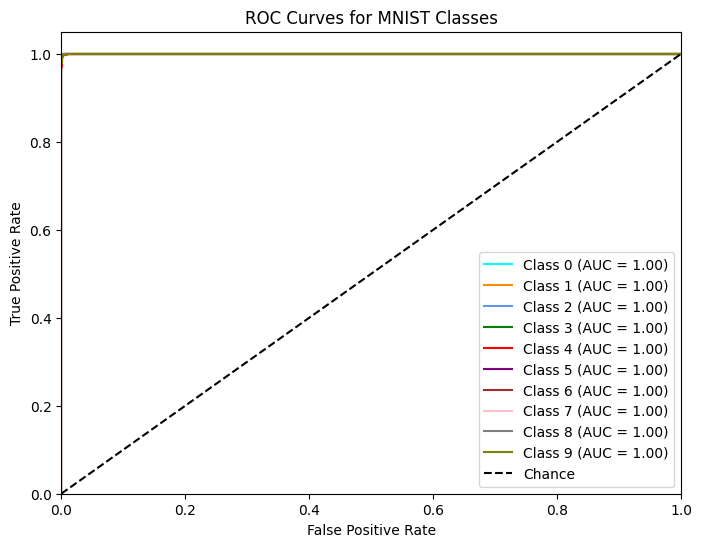

In [2]:
# Step 1: Get predicted probabilities for the test set
y_pred_proba = model.predict(x_test)

# Number of classes
n_classes = y_test.shape[1]

# Step 2: Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for MNIST Classes')
plt.legend(loc='lower right')
plt.show()

# **Test model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


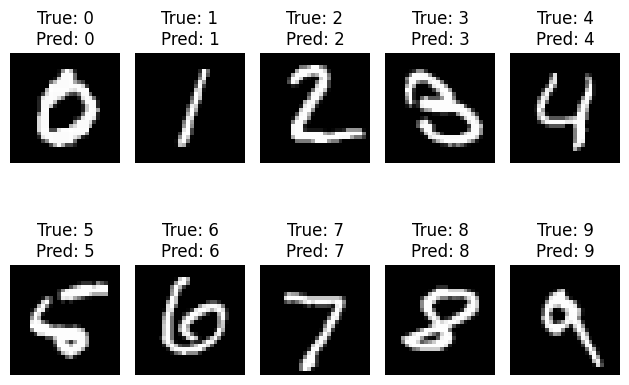

In [3]:
# Function to get one example of each digit (0-9) from the test set
def get_samples_for_digits(x_test, y_test):
    samples = []
    labels = []
    for digit in range(10):
        # Find the index where the label equals the digit
        idx = np.where(np.argmax(y_test, axis=1) == digit)[0][0]
        samples.append(x_test[idx])
        labels.append(digit)
    return np.array(samples), labels

# Get one sample for each digit
samples, labels = get_samples_for_digits(x_test, y_test)

# Predict the labels for these samples
predictions = model.predict(samples)

# Plot and show the images with predicted and true labels
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Test model with input picture**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


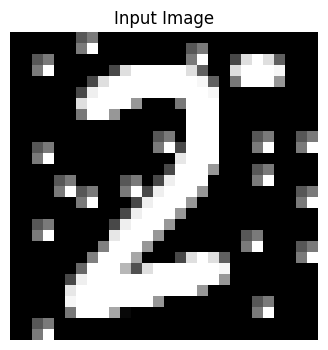

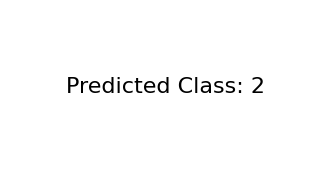

Prediction probabilities: [[1.3592497e-09 1.0618000e-09 8.7177414e-01 1.2809099e-01 9.2243927e-06
  8.4823714e-06 2.5111288e-10 1.7355426e-08 1.1489970e-04 2.1930216e-06]]
Predicted class: 2


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/2.png')

# Resize the image to 28x28
img_resized = cv2.resize(img, (28, 28))

# Convert to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Normalize pixel values
img_normalized = (img_gray / 255.0).astype(np.float32)

# Reshape to match model input
# Add batch dimension and channel dimension
img_input = img_normalized.reshape(1, 28, 28, 1)

# Make prediction
predict = model.predict(img_input)

# Get the predicted class
predicted_class = np.argmax(predict)

# Display the input image
plt.figure(figsize=(4, 4))
plt.imshow(img_resized)
plt.axis('off')
plt.title(f'Input Image')

# Show the prediction result
plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, f'Predicted Class: {predicted_class}', fontsize=16, ha='center', va='center')
plt.axis('off')

plt.show()

# Optional: print the raw prediction probabilities
print("Prediction probabilities:", predict)
print("Predicted class:", predicted_class)


# **Save Model**

In [9]:
# Save the model after training
model.save('my_mnist_model.h5')

# Later, load the model for testing or inference
from tensorflow.keras.models import load_model

loaded_model = load_model('my_mnist_model.h5')
loss, accuracy = loaded_model.evaluate(x_test, y_test)
print(f'Test accuracy after loading model: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9888 - loss: 0.0439
Test accuracy after loading model: 0.9905999898910522
